# Clustering
Crecit Card dataset https://www.kaggle.com/code/des137/customer-segmentation-credit-cards/data


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#designate the path where you saved your OEC data
data_path = "CC GENERAL.csv"

#Load the data using pandas read_csv function. 
orig_data = pd.read_csv(data_path)
orig_data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12.000000,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12.0


Use the describe function to get a feel for the data, and the categorys

In [23]:
orig_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8636.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.948287,1733.144453,833.981842,0.541312,11.534391
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.921296,2895.063400,2335.990488,2.055102,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.040017,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.200000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,12.000000,12.000000


Use the info function to get a feel for the different categories and there counts and data type.

In [24]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Using the drop function, remove the 'CUST_ID' column as we don't need this piece of information.

In [25]:
orig_data.drop(['CUST_ID'], axis=1, inplace=True)
orig_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8636.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.948287,1733.144453,833.981842,0.541312,11.534391
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.921296,2895.063400,2335.990488,2.055102,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.040017,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.200000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,12.000000,12.000000


Inspect the original data see if we have an NA or missing values

In [26]:
orig_data.isna().mean() * 100

BALANCE                             0.00000
BALANCE_FREQUENCY                   0.00000
PURCHASES                           0.00000
ONEOFF_PURCHASES                    0.00000
INSTALLMENTS_PURCHASES              0.00000
CASH_ADVANCE                        0.00000
PURCHASES_FREQUENCY                 0.00000
ONEOFF_PURCHASES_FREQUENCY          0.00000
PURCHASES_INSTALLMENTS_FREQUENCY    0.00000
CASH_ADVANCE_FREQUENCY              0.00000
CASH_ADVANCE_TRX                    0.00000
PURCHASES_TRX                       0.00000
CREDIT_LIMIT                        0.00000
PAYMENTS                            0.00000
MINIMUM_PAYMENTS                    0.00000
PRC_FULL_PAYMENT                    0.00000
TENURE                              3.50838
dtype: float64

Based on the column(s) you found had missing values, replace the data with an appropriate fill value (Median, Mean etc.)

In [27]:
orig_data['TENURE'].fillna(orig_data['TENURE'].median(), inplace=True)
orig_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.948287,1733.144453,833.981842,0.541312,11.550726
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.921296,2895.063400,2335.990488,2.055102,1.290625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.040017,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.200000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,12.000000,12.000000


For each data column, plot the Kernel Density Estimate (KDE) using the seaborn package.

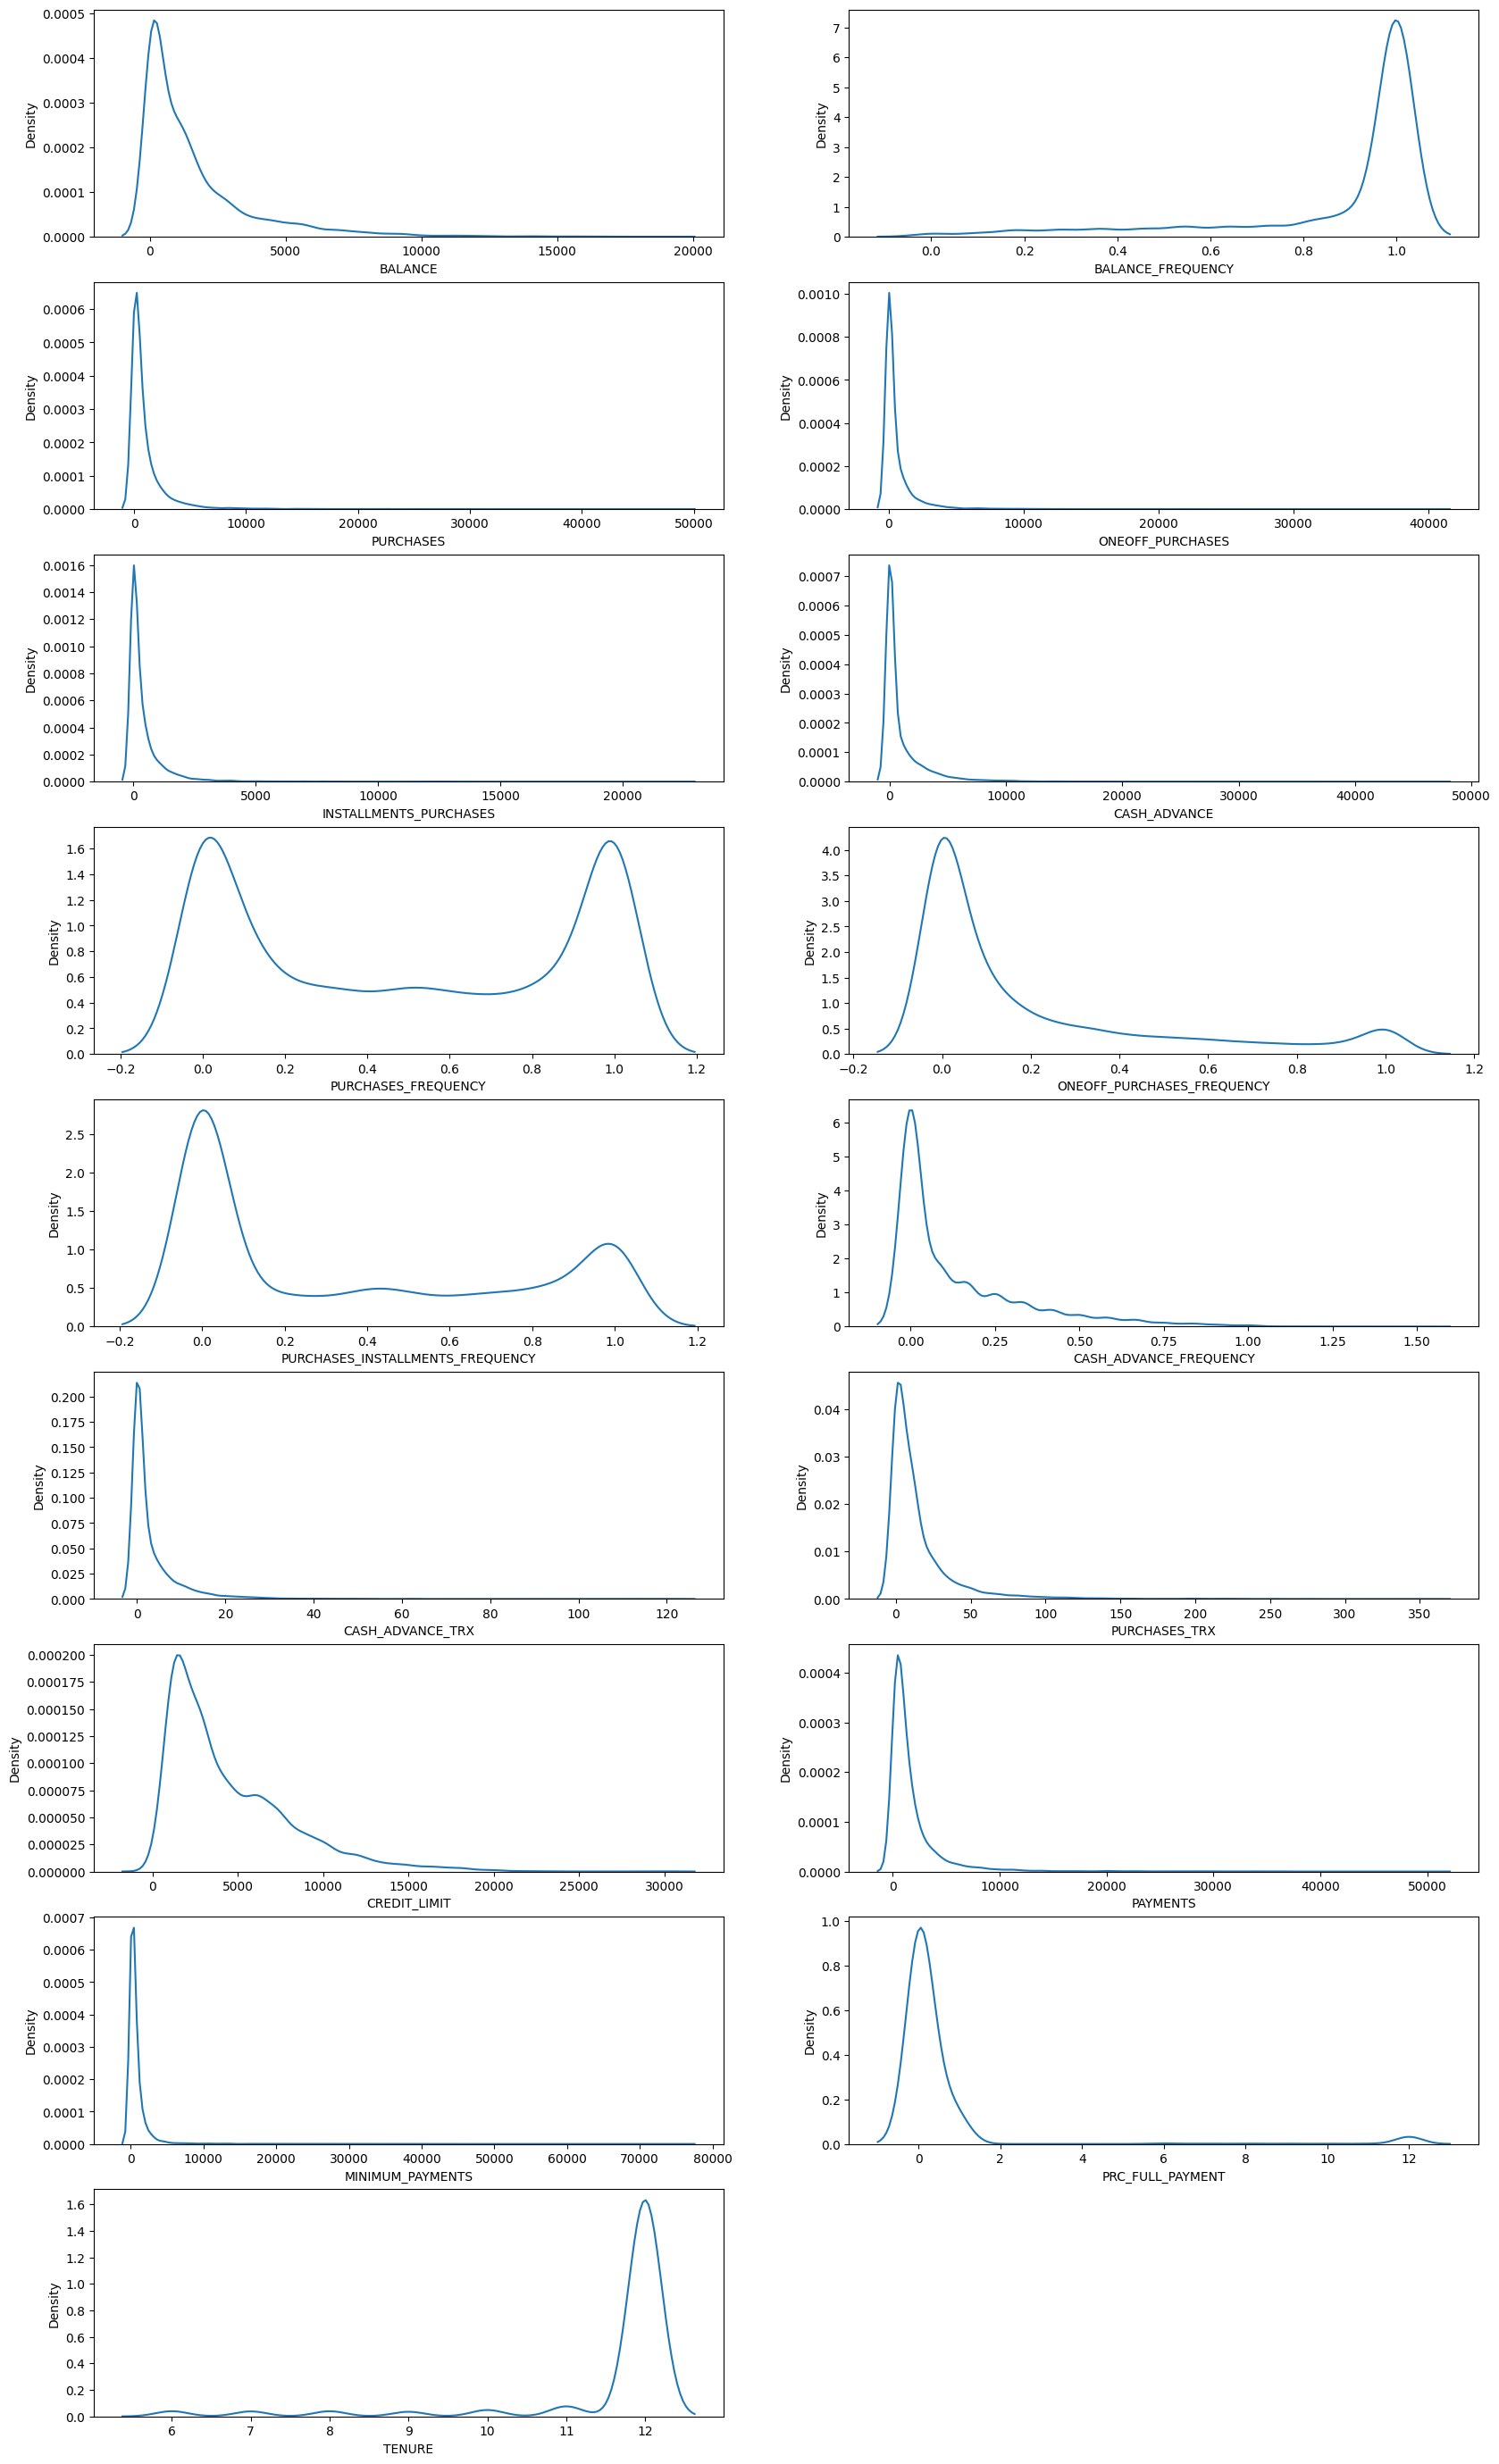

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,35))
for i, col in enumerate(orig_data.columns):
    if orig_data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(orig_data[col], ax=ax)
        plt.xlabel(col)
plt.show()

Inpsect the KDE plots and consider which columns you think are important to the Credit Card dataset. 

Consider how the plots are skewed, and the variation across the plots. 
Because we're going to be using clustering to get a good visualisation we want to include the skewness.

In [29]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

Here we're going to take the natural log of our dataset to accentuate our KDE plots.

Consider: Why we might want to use ln(1+x) instead of ln(x)

In [30]:
for col in cols:
    orig_data[col] = np.log1p(orig_data[col])

Plot your KDE plots with your chosen subset of columns with the newly transformed column data

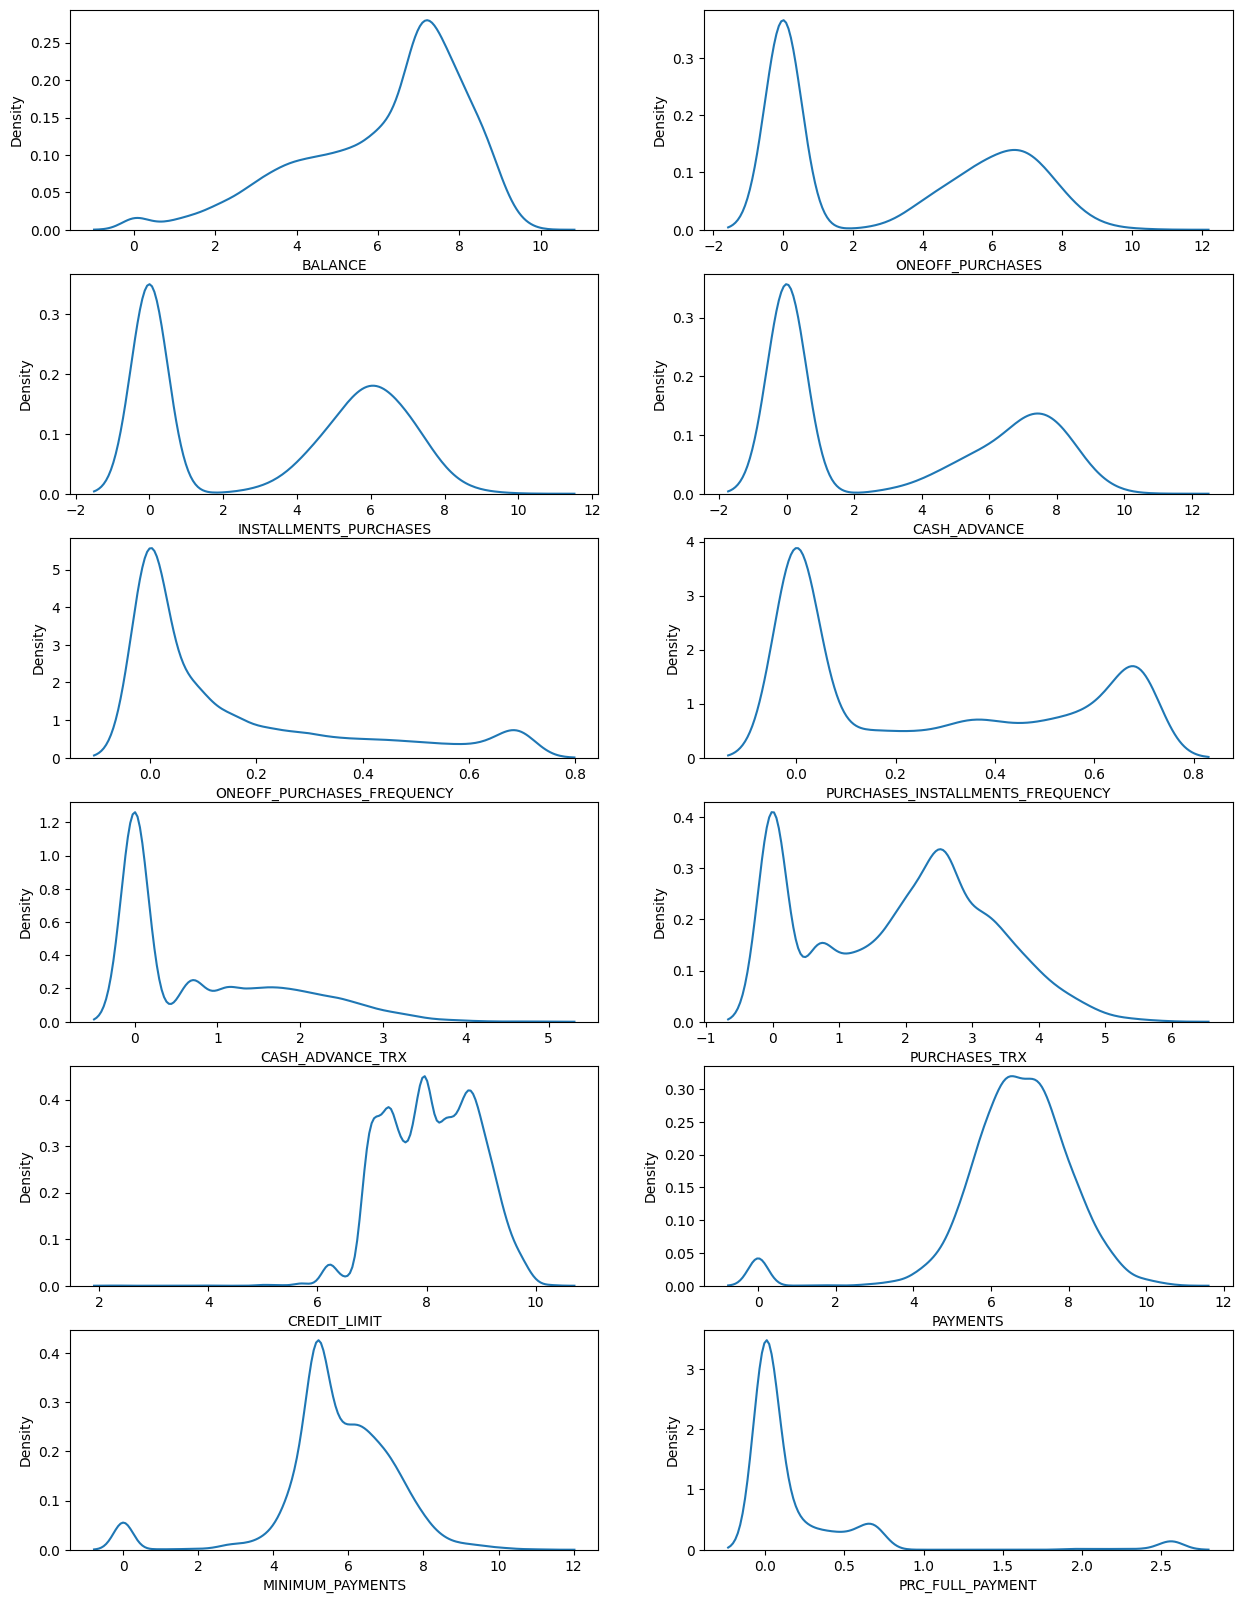

In [31]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(orig_data[col], ax=ax)
plt.show()

Plot a heatmap of the correlations of your columns and check if there are any highly correlated features that you can remove (say correlation >=0.95)

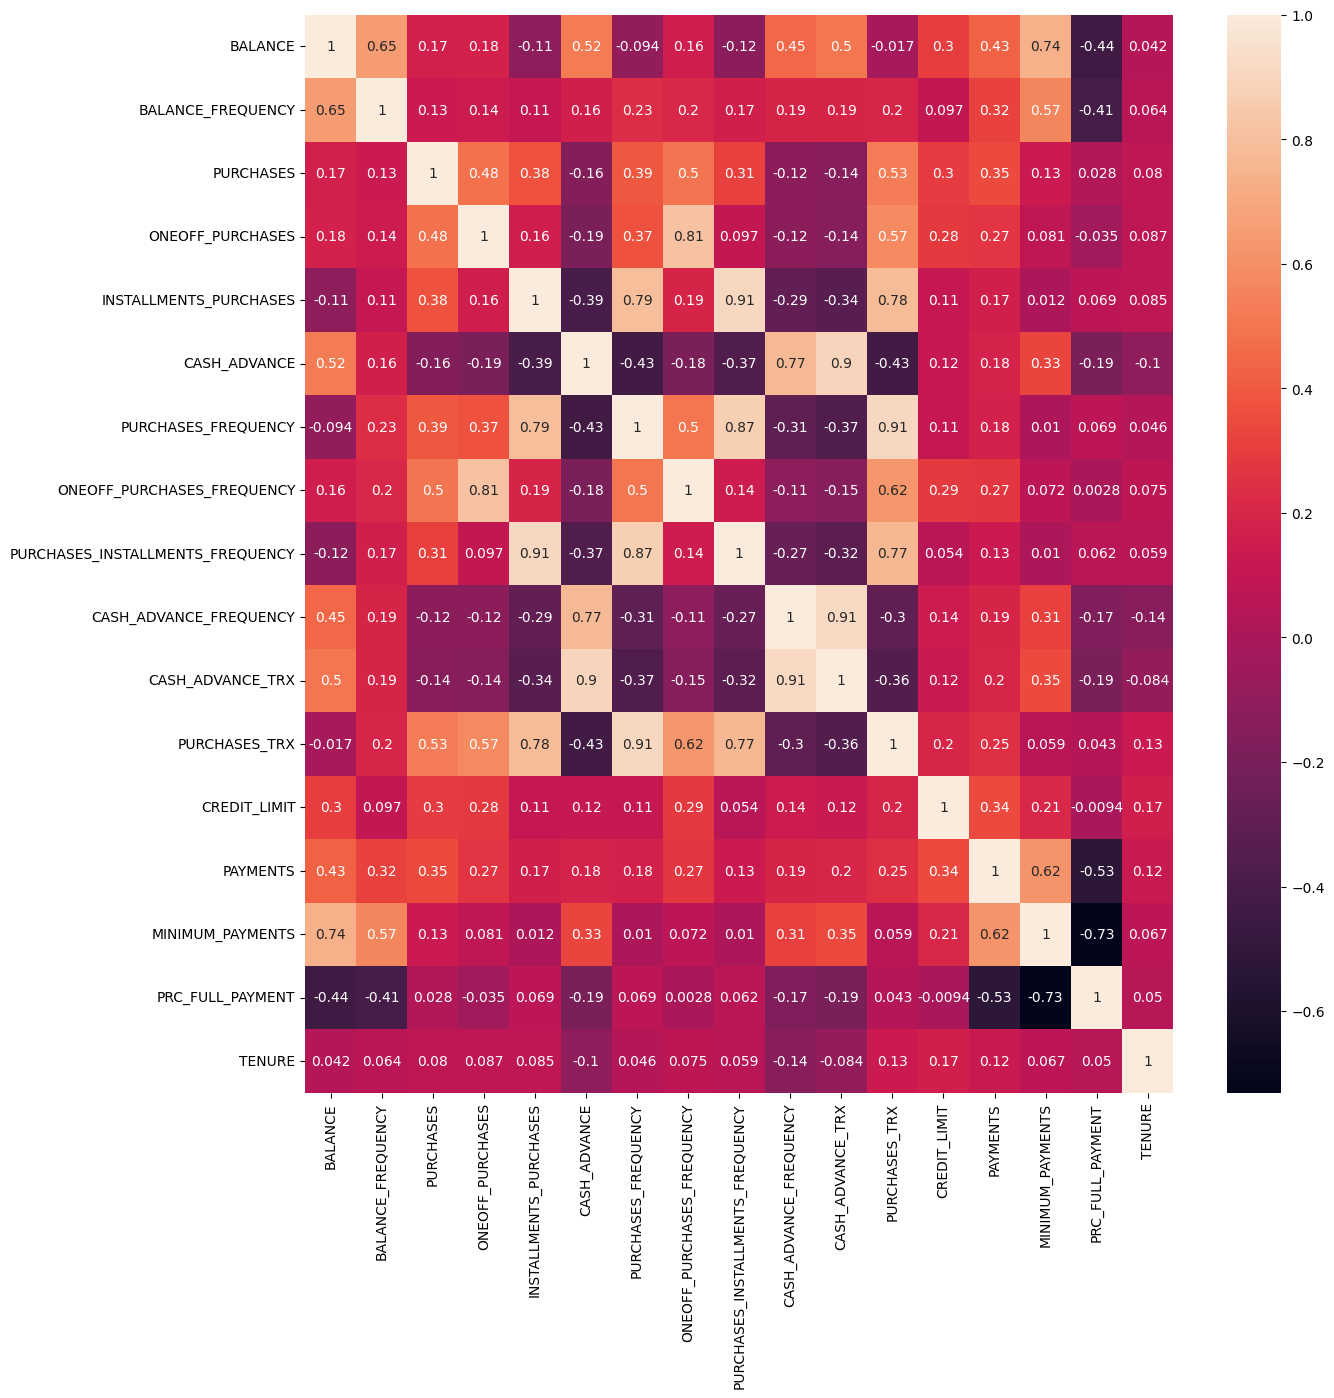

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(orig_data.corr(), annot=True)
plt.show()

Use the elbow method to find a good KMeans clustering for our dataset.

I want to consider clusters in the range of 1 to 10

Optionally: I consider if using a PCA (Principal component analysis) before clustering has any effect on the number of clusters.

Display the elbow plot, by plotting the numbers of clusters against the models inertia


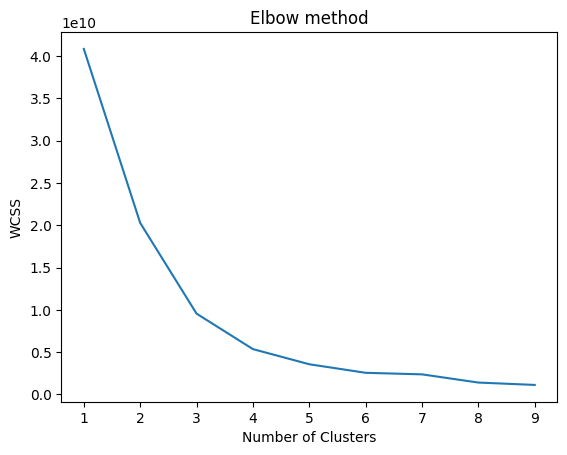

In [33]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k).fit(orig_data) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Plot the silhouette score of each of the kmeans score to better inspect the clusters and decide where the best clustering lies.


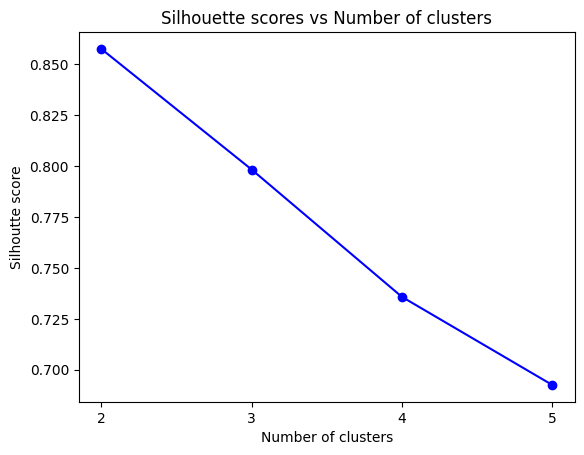

In [34]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(orig_data, model.labels_) for model in kmeans_models[1:5]]
plt.plot(range(2,6), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4, 5])
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

# The highest silhouette gives us an idea of the ideal number of clusters.

# Train the model for the optimal number of clusters based on the highest silhouette score.

In [35]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(orig_data)

print('Silhoutte score of our model is ' + str(silhouette_score(orig_data, kmeans.labels_)))


Silhoutte score of our model is 0.857585921854741


Add the labels to our original dataset with a column called 'cluster_id'

In [36]:
#add the cluster ids to the table
orig_data['cluster_id'] = kmeans.labels_


Transform our column data back to the original by exponentiating it.

In [37]:
for col in cols:
    orig_data[col] = np.exp(orig_data[col])


Use a scatter plot to show the ONEOFF_PURCHASES vs PURCHASES overall. 

Using the cluster-ids to color the points.

Is there any pattern to how our clustering represents singular purchases vs. many purchases.

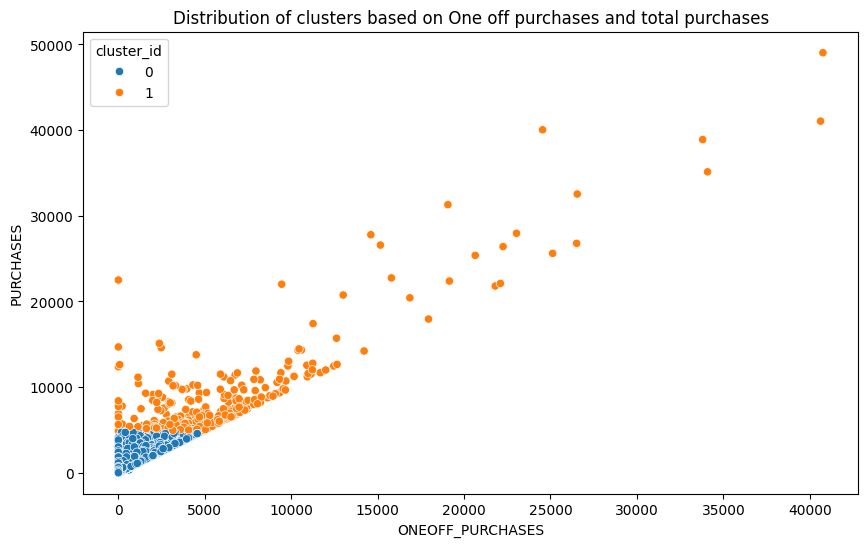

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=orig_data, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

Use a scaterplot to show the CREDIT_LIMIT vs. PURCHASES.

Use the cluser-id to color the points. 

This will show the distribution of the clusters based on the credit limit and total purchases.

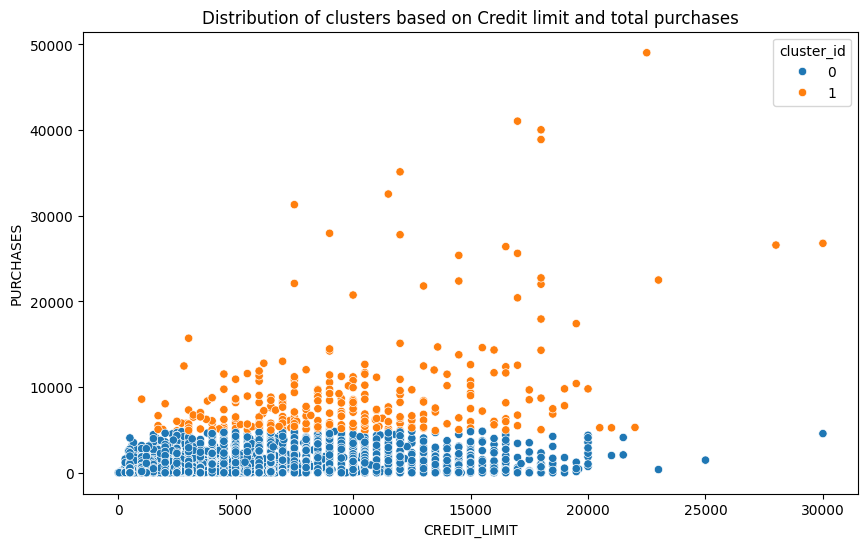

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=orig_data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()